In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [2]:
# load datasets I will be using
SpotifyData = pd.read_csv('charts.csv')
Artists = pd.read_csv('singers_gender.csv')
Grammys = pd.read_csv('the_grammy_awards.csv')

In [3]:
# Have a look at the 3 datasets
SpotifyData

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


In [4]:
Artists

,artist,gender,category
0,12 Gauge,male,African-American_male_rappers
1,1987,male,Swedish_male_singers
2,2 Chainz,male,African-American_male_rappers
3,2 Pistols,male,African-American_male_rappers
4,21 Savage,male,African-American_male_rappers
...,...,...,...
23172,�ystein Sunde,male,Male_guitarists
23173,�yvind Nypan,male,Male_guitarists
23174,�na MacLochlainn,female,Irish_female_singers
23175,�na Palliser,female,Irish_female_singers


In [5]:
Grammys

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True
...,...,...,...,...,...,...,...,...,...,...
4805,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,NaN,"Van Cliburn, artist (Symphony Of The Air Orche...",NaN,True
4806,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,NaN,"Andres Segovia, artist",https://www.grammy.com/sites/com/files/styles/...,True
4807,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,NaN,"Hollywood String Quartet (Alvin Dinkin, Paul S...",NaN,True
4808,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,NaN,NaN,NaN,True


In [6]:
# Check the SpotifyData Types
SpotifyData.info()

# Straight away I can see a column that will be used coming in as an object not a date and thats the date column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


In [7]:
# Break up the current date column into 3 columns by splitting by the delimiter (-)
SpotifyData[['year', 'month','day']] = SpotifyData['date'].str.split('-', 2, expand=True)

In [9]:
# Now Create a new column called TrueDate with the month and year.
SpotifyData["TrueDate"] = SpotifyData[['year', 'month']].agg('-'.join, axis=1)

In [10]:
# Change TrueDate to a date field
SpotifyData['TrueDate'] = pd.to_datetime(SpotifyData['TrueDate'])

In [11]:
SpotifyData.head()

,title,rank,date,artist,url,region,chart,trend,streams,year,month,day,TrueDate
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0,2017,01,01,2017-01-01
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0,2017,01,01,2017-01-01
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0,2017,01,01,2017-01-01
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0,2017,01,01,2017-01-01
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0,2017,01,01,2017-01-01


In [12]:
#Removing Columns in the datasets I dont need
Spotify = SpotifyData[['title','rank','artist','region','streams','TrueDate']]
Grammy = Grammys[['year','title','category','nominee','artist','winner']]

In [13]:
#Recheck types
Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   title     object        
 1   rank      int64         
 2   artist    object        
 3   region    object        
 4   streams   float64       
 5   TrueDate  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.2+ GB


In [14]:
#Checking for missing Values
Missing_Values = Spotify.isnull().sum()
Missing_Values

title            11
rank              0
artist           18
region            0
streams     5851610
TrueDate          0
dtype: int64

In [15]:
#Filter data to only show streams greater than 10
Spotify_Clean = Spotify[(Spotify['streams'] >= 10)]

In [16]:
# Now checking Missing Data Again
Missing_Values_New = Spotify_Clean.isnull().sum()
Missing_Values_New

title       7
rank        0
artist      0
region      0
streams     0
TrueDate    0
dtype: int64

In [17]:
#Fill missing values with No Title
Spotify_Cleaned = Spotify_Clean.fillna("No Title")
Spotify_Cleaned

,title,rank,artist,region,streams,TrueDate
0,Chantaje (feat. Maluma),1,Shakira,Argentina,253019.0,2017-01-01
1,Vente Pa' Ca (feat. Maluma),2,Ricky Martin,Argentina,223988.0,2017-01-01
2,Reggaetón Lento (Bailemos),3,CNCO,Argentina,210943.0,2017-01-01
3,Safari,4,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,173865.0,2017-01-01
4,Shaky Shaky,5,Daddy Yankee,Argentina,153956.0,2017-01-01
...,...,...,...,...,...,...
25276069,Ojalá (feat. Darell),196,"De La Ghetto, Almighty, Bryant Myers",Uruguay,1178.0,2018-01-01
25276070,Lo Que Pasa en la Noche,197,Mano Arriba,Uruguay,1178.0,2018-01-01
25276071,El Equivocado,198,Mano Arriba,Uruguay,1170.0,2018-01-01
25276072,Que Fui Tu Amante,199,El Gucci y Su Banda,Uruguay,1165.0,2018-01-01


In [18]:
# Now using Group By to check some of the stats for the Spotify streams based on artist, streams and date.

# Artist with most Streams
Spotify_Streams = Spotify_Cleaned.groupby('artist')['streams'].sum()
Spotify_Streams.sort_values(ascending=False)


artist
Ed Sheeran                        2.359566e+10
Post Malone                       1.945275e+10
Drake                             1.818064e+10
Billie Eilish                     1.719380e+10
Ariana Grande                     1.537585e+10
                                      ...     
Ragga Holm                        1.002000e+03
Kastrācija, Steps                 1.001000e+03
Wegz, Abyusif                     1.001000e+03
D-mol                             1.001000e+03
Street Pound Productions, Lota    1.001000e+03
Name: streams, Length: 40177, dtype: float64

In [19]:
# Months with the most streams
Month_Streams = Spotify_Cleaned.groupby('TrueDate')['streams'].sum()
Month_Streams.sort_values(ascending=False)

TrueDate
2020-12-01    2.507929e+10
2021-09-01    2.373810e+10
2021-08-01    2.355466e+10
2021-07-01    2.350724e+10
2021-10-01    2.336811e+10
2021-11-01    2.315340e+10
2021-05-01    2.311788e+10
2021-06-01    2.279678e+10
2019-12-01    2.261254e+10
2020-01-01    2.203682e+10
2020-03-01    2.187275e+10
2021-03-01    2.157861e+10
2020-10-01    2.150689e+10
2020-07-01    2.143274e+10
2020-11-01    2.128075e+10
2021-04-01    2.121583e+10
2020-08-01    2.097501e+10
2020-09-01    2.076626e+10
2020-02-01    2.076379e+10
2021-01-01    2.074708e+10
2019-10-01    2.015455e+10
2019-07-01    2.007794e+10
2020-05-01    1.986039e+10
2019-09-01    1.961388e+10
2018-12-01    1.956001e+10
2019-08-01    1.952649e+10
2019-11-01    1.944494e+10
2019-03-01    1.921316e+10
2019-05-01    1.914481e+10
2020-04-01    1.895110e+10
2020-06-01    1.886989e+10
2019-06-01    1.882215e+10
2019-04-01    1.871593e+10
2021-02-01    1.860548e+10
2019-01-01    1.821725e+10
2018-07-01    1.792293e+10
2019-02-01    1.792

<AxesSubplot:xlabel='TrueDate'>

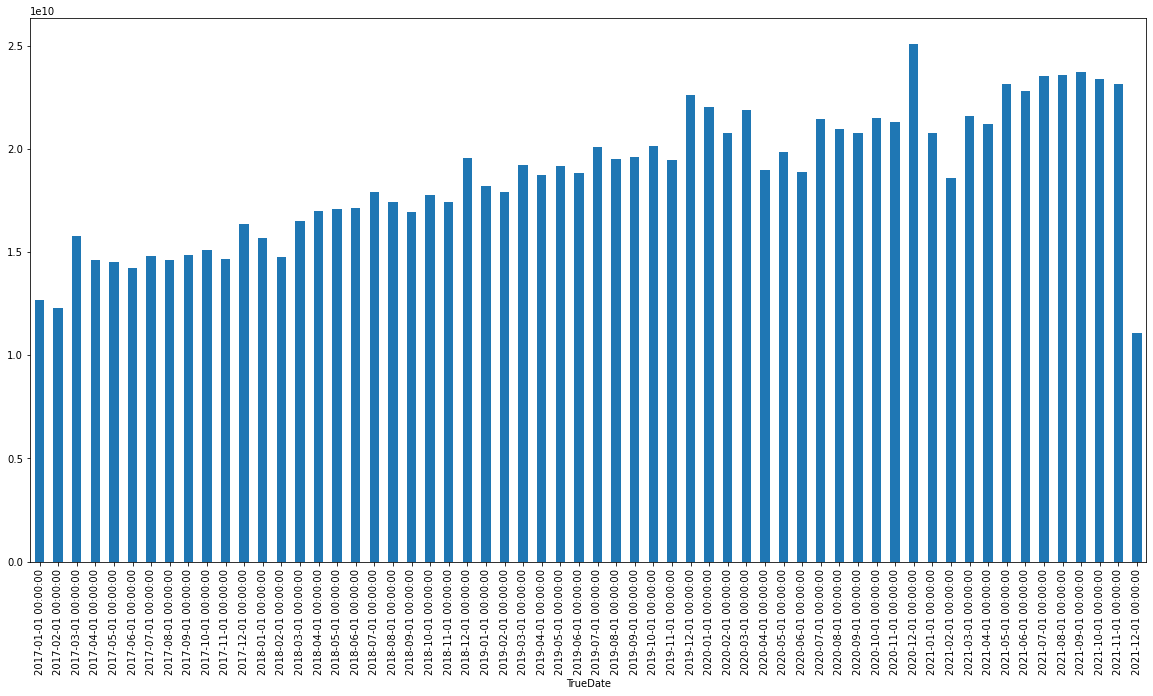

In [20]:
# Graphically Viewing the Months with the most streams
Month_Streams.plot.bar(figsize=(20,10))

In [21]:
# Checking the songs with the most streams per month
Top_Streams_by_Artist = Spotify_Cleaned.loc[Spotify_Cleaned.groupby("TrueDate")["streams"].idxmax()]
Top_Streams_by_Artist

,title,rank,artist,region,streams,TrueDate
1671779,Shape of You,1,Ed Sheeran,Global,7765131.0,2017-01-01
984707,Shape of You,1,Ed Sheeran,Global,7985803.0,2017-02-01
9786199,Shape of You,1,Ed Sheeran,Global,9891056.0,2017-03-01
11663414,Despacito - Remix,1,"Luis Fonsi, Daddy Yankee, Justin Bieber",Global,6888677.0,2017-04-01
12250403,Despacito (Featuring Daddy Yankee),1,Luis Fonsi,Global,11381520.0,2017-05-01
10950220,Despacito - Remix,1,"Luis Fonsi, Daddy Yankee, Justin Bieber",Global,7603132.0,2017-06-01
11045556,Despacito - Remix,1,"Luis Fonsi, Daddy Yankee, Justin Bieber",Global,6398530.0,2017-07-01
11028207,Look What You Made Me Do,1,Taylor Swift,Global,7908492.0,2017-08-01
23080392,rockstar,1,"Post Malone, 21 Savage",Global,7156650.0,2017-09-01
22400951,rockstar,1,"Post Malone, 21 Savage",Global,7113735.0,2017-10-01


<AxesSubplot:ylabel='artist'>

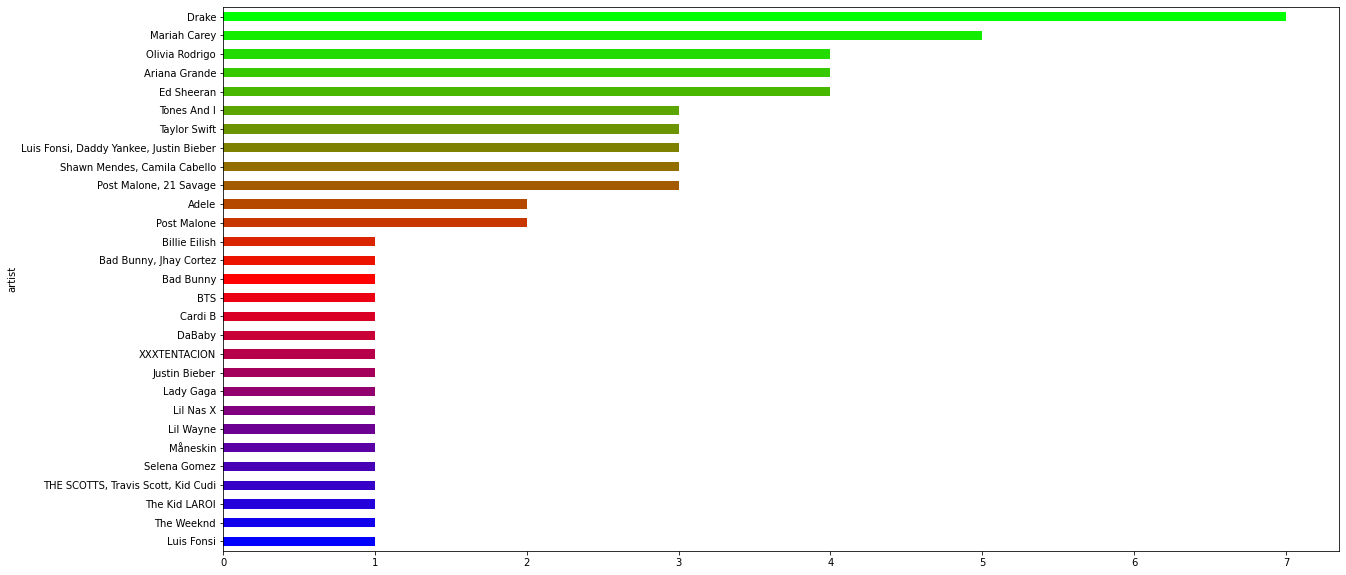

In [34]:
# Graphically Viewing the Artist who's song had the most streams in a month.
Artist_Streams = Top_Streams_by_Artist.groupby('artist').sum()['rank']
Artist_Streams_Sorted = Artist_Streams.sort_values(ascending=True)

import matplotlib.cm as cm
colors = cm.brg(np.linspace(0,1,len(Artist_Streams_Sorted)))
Artist_Streams_Sorted.plot.barh(figsize=(20,10),color=colors)


In [24]:
# Next I will do a left merge between my Spotify Cleaned file and the Artists file to add the type of artist to my Spotify file
# First to make sure the names are all uniform type I will capatilise the first and Second Names
Artists['artist']= Artists['artist'].str.title()
Spotify_Cleaned['artist']= Spotify_Cleaned['artist'].str.title()

In [25]:
# Next I will do a left merge between my Spotify Cleaned file and the Artists file to add the type of artist to my Spotify file
# I will specify that the merge should be done looking at the artist column in both.

Spotify_Combined = Spotify_Cleaned.merge(Artists,on="artist", how="left")


In [26]:
#Filling any missing artists with "N/A"
Spotify_Combined_Cleaned = Spotify_Combined.fillna("N/A")

<AxesSubplot:ylabel='category'>

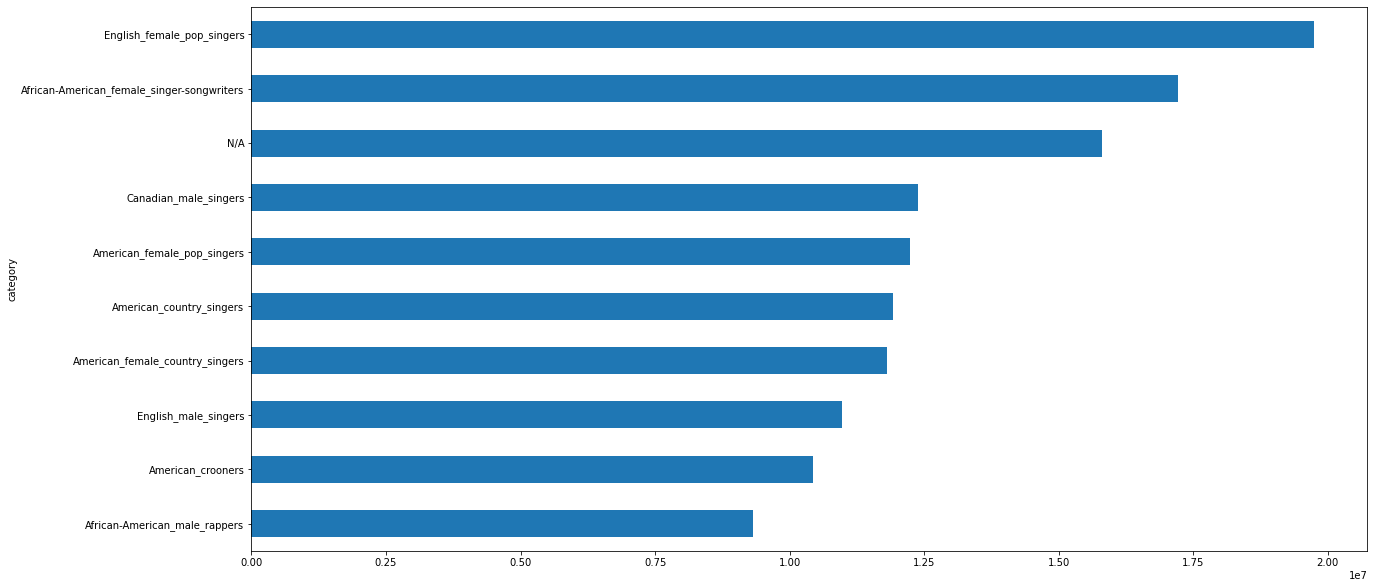

In [27]:
# Getting the total streams by category
Top_Streams_by_Category = Spotify_Combined_Cleaned.loc[Spotify_Combined_Cleaned.groupby("category")["streams"].idxmax()]
Top_Category = Top_Streams_by_Category.groupby('category')['streams'].sum()

# To better visualise the categories I will only take the top 10 categories by streams.
Top_Categories = Top_Category.nlargest(n=10)
Top_Categories_Sorted = Top_Categories.sort_values(ascending=True)
Top_Categories_Sorted.plot.barh(figsize=(20,10))

In [28]:
# Now I will merge the combined file with the Grammys file to see count of Grammy nominations each artist has received.
# Again I will specify that the merge should be done looking at the artist column in both.

Spotify_All_Merged = Spotify_Combined_Cleaned.merge(Grammy, on="artist", how="left")

In [29]:
#Filling any missing artists with "N/A"
All_Combined_Cleaned = Spotify_All_Merged.fillna("N/A")

In [30]:
#Getting the Unique No. of Grammy Nominations
All_Nominees = All_Combined_Cleaned.groupby('artist').nominee.nunique()
All_Nominees.sort_values(ascending=False)

artist
Aretha Franklin          15
U2                       14
Beyoncé                  13
Ella Fitzgerald          13
Bruce Springsteen        12
                         ..
Gims, Mohamed Ramadan     1
Gims, Sting               1
Gims, Super Sako          1
Gims, Vianney             1
하숙자                       1
Name: nominee, Length: 40084, dtype: int64

<AxesSubplot:xlabel='artist'>

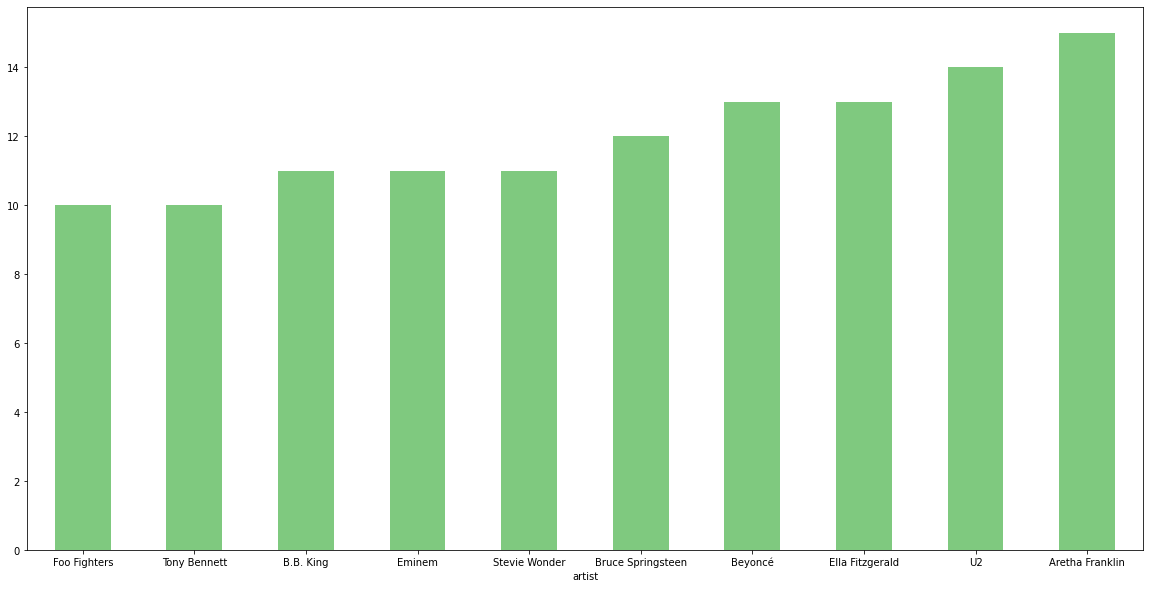

In [31]:
# Getting the top 10 artists with Grammy nominations
Top_Nominees = All_Nominees.nlargest(n=10)
Top_Nominees_Sorted = Top_Nominees.sort_values(ascending=True)
Top_Nominees_Sorted.plot.bar(figsize=(20,10),rot=0,colormap='Accent')

In [32]:
# Taking the top 20 songs based on Spoitfy streams
Top_Songs = All_Combined_Cleaned.loc[All_Combined_Cleaned.groupby("title_x")["streams"].idxmax()]
Top_Songs_Sorted = Top_Songs.sort_values(by=['streams'], ascending=False)
Top_20_Songs = Top_Songs_Sorted.nlargest(n=20, columns=['streams'])
Top_20_Songs

,title_x,rank,artist,region,streams,TrueDate,gender,category_x,year,title_y,category_y,nominee,winner
25087243,Easy On Me,1,Adele,Global,19749704.0,2021-10-01,female,English_female_pop_singers,2016.0,59th Annual GRAMMY Awards (2016),Record Of The Year,Hello,True
20281901,All I Want for Christmas Is You,1,Mariah Carey,Global,17223237.0,2020-12-01,female,African-American_female_singer-songwriters,2005.0,48th Annual GRAMMY Awards (2005),Best Female R&B Vocal Performance,We Belong Together,True
20281904,Last Christmas,2,Wham!,Global,15813799.0,2020-12-01,N/A,N/A,N/A,N/A,N/A,N/A,N/A
18830993,drivers license,1,Olivia Rodrigo,Global,13714177.0,2021-01-01,N/A,N/A,N/A,N/A,N/A,N/A,N/A
22440452,good 4 u,1,Olivia Rodrigo,Global,12586645.0,2021-05-01,N/A,N/A,N/A,N/A,N/A,N/A,N/A
23357886,Girls Want Girls (with Lil Baby),1,Drake,Global,12384750.0,2021-09-01,male,Canadian_male_singers,2016.0,59th Annual GRAMMY Awards (2016),Best Rap/Sung Performance,Hotline Bling,True
20281905,Santa Tell Me,3,Ariana Grande,Global,12229331.0,2020-12-01,female,American_female_pop_singers,2019.0,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,True
20281910,It's Beginning to Look a Lot like Christmas,4,Michael Bublé,Global,11975033.0,2020-12-01,N/A,N/A,2019.0,62nd Annual GRAMMY Awards (2019),Best Traditional Pop Vocal Album,Love (Deluxe Edition),True
20281915,Jingle Bell Rock,5,Bobby Helms,Global,11924353.0,2020-12-01,male,American_country_singers,N/A,N/A,N/A,N/A,N/A
20281916,Rockin' Around The Christmas Tree,6,Brenda Lee,Global,11801426.0,2020-12-01,female,American_female_country_singers,N/A,N/A,N/A,N/A,N/A


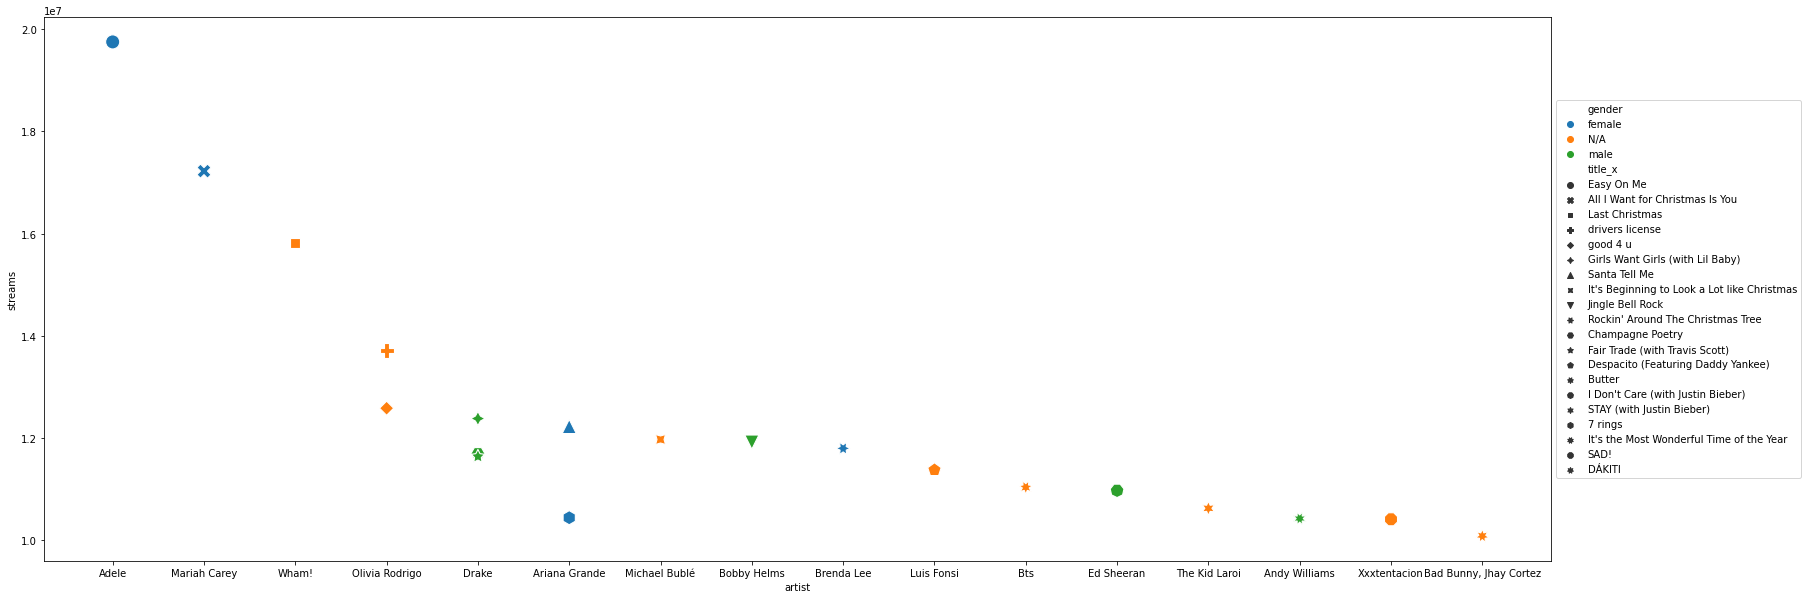

In [35]:
plt.subplots(figsize=(27,10))
Plot = sns.scatterplot(data=Top_20_Songs, x="artist", y="streams", hue="gender", s=200,style="title_x")
Plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)